# Workshop II - Swarm Intelligence and Sinergy: Ant Colony for the Traveling Salesman Problem




## Traveling Salesman Problem
The general idea is a salesman must to visit a set of cities exactly once and return to thr original city. The goal is to get the shortest possible route starting on a specific city.

In [17]:

"""
Description: This code implements the Ant Colony Optimization algorithm
to solve the Traveling Salesman Problem. It generates a list of cities
with random coordinates, calculates the shortest route that visits each city
exactly once, and visualizes the optimal path in a 3D plot.

Author: Carlos Andrés Sierra Virgüez - Andrés Felipe Vanegas Bogota
Date: Mar-23th-2024
Last actualization: Mar-3th-2024
"""

import numpy as np

def generate_cities(number_cities) -> list:
    """
    This function generates a list of cities with random coordinates in 3D space.

    Parameters:
    - number_cities (int): Number of cities to generate.

    Returns:
    - list: A list of cities with random coordinates.
    """
    cities = []
    for _ in range(number_cities):
        city = np.random.rand(3)  # Generate random 3D coordinates for the city
        cities.append(city)
    return cities

def calculate_distance(point_1: np.array, point_2: np.array) -> float:
    """
    This function calculates the Euclidean distance between two points.

    Parameters:
    - point_1 (np.array): First point.
    - point_2 (np.array): Second point.

    Returns:
    - float: The Euclidean distance between the two points.
    """
    return np.linalg.norm(point_1 - point_2)


In [18]:
def ant_colony_optimization(
    cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.

    Returns:
    - tuple: A tuple containing the best path found and its length.
    """

    number_cities = len(cities)
    pheromone = np.ones((number_cities, number_cities))

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):

                    probabilities[i] = (pheromone[current_city, unvisited_city] ** alpha) * \
                                        ((1 / calculate_distance(cities[current_city], cities[unvisited_city])) ** beta)


                probabilities /= probabilities.sum()


                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                    )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length

    return best_path, best_path_length


Create list of cities and calculate the best route

In [41]:
# Model Parameters
number_cities = 30  # Number of cities in the traveling salesman problem
number_ants = 20  # Number of ants in the colony
number_iterations = 100  # Number of iterations for optimization
alpha = 1  # Weight for pheromone trail
beta = 1 # Weight for distance between cities
evaporation_rate = 0.5  # Pheromone evaporation rate
Q = 1  # Amount of pheromones deposited by an ant


# Generate a list of cities (this should be defined elsewhere)
cities = generate_cities(number_cities)

# Execute ant colony optimization
best_path, best_path_length = ant_colony_optimization(
    cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q
)

Best path: [26, 20, 0, 12, 2, 6, 8, 7, 9, 19, 3, 16, 25, 24, 28, 13, 14, 27, 18, 15, 1, 22, 10, 5, 4, 23, 21, 11, 17, 29]
Best path length: 9.685451002751002


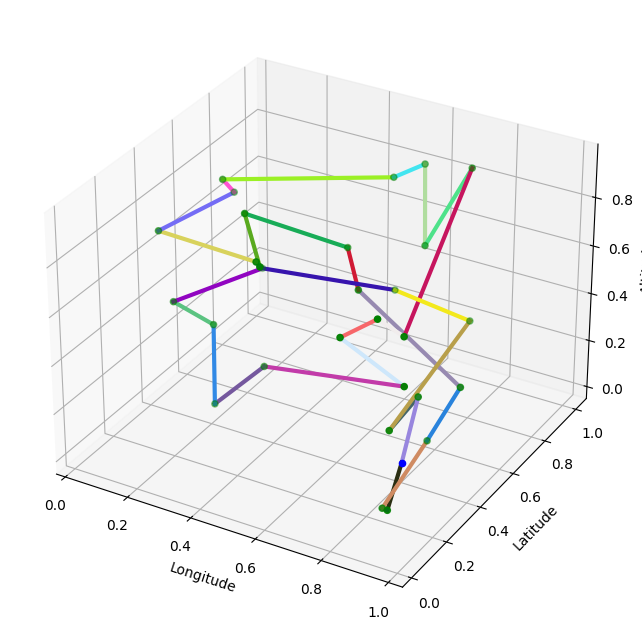

In [39]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color():
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()

# Print the best path and its length
print("Best path:", best_path)
print("Best path length:", best_path_length)

# Visualize the route found by ACO
plot_aco_route(np.array(cities), best_path)
